# Glass Identification Project

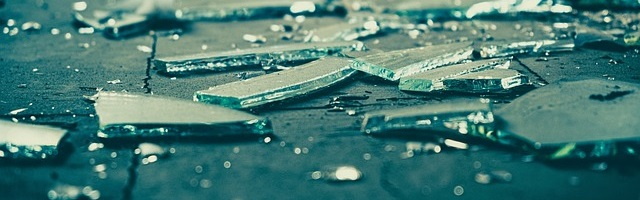

Dataset:  

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Input variables:  
    1.	 Id number: 1 to 214  
    2.	 RI: refractive index  
    3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)  
    4.	Mg: Magnesium  
    5.	Al: Aluminum  
    6.	Si: Silicon  
    7.	K: Potassium  
    8.	Ca: Calcium  
    9.	Ba: Barium  
    10.	Fe: Iron  

Output variable:   

    Type of glass:  
        1- building_windows_float_processed  
        2- building_windows_non_float_processed  
        3- vehicle_windows_float_processed  
        4- vehicle_windows_non_float_processed (none in this database)  
        5- containers  
        6- tableware  
        7- headlamps  

Aim: 
 
    Develop a machine learning model to predict type of glass (Classification model)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
glass_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv')
glass_df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


# Data pre-processing & EDA

In [3]:
# give column names
glass_df.columns=['id','ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass']
glass_df.head()

,id,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
glass_df.shape

(213, 11)

In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      213 non-null    int64  
 1   ri      213 non-null    float64
 2   Na      213 non-null    float64
 3   Mg      213 non-null    float64
 4   Al      213 non-null    float64
 5   Si      213 non-null    float64
 6   K       213 non-null    float64
 7   Ca      213 non-null    float64
 8   Ba      213 non-null    float64
 9   Fe      213 non-null    float64
 10  glass   213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [6]:
glass_df.isnull().sum()

id       0
ri       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
glass    0
dtype: int64

Observations:  
There are no nulls in the dataset.  

In [7]:
# drop id
glass_df.drop('id',axis=1,inplace=True)

In [8]:
glass_df.columns

Index(['ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass'], dtype='object')

In [9]:
glass_df.describe()

,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Observations:  
    Mean is almost equal to Median, indicating normal distribution of the data

In [10]:
# create a copy of the original df to make the edits
glass_df1=glass_df.copy()

In [11]:
# categorise glass_type into 2 classes
glass_type=[]
for i in glass_df.glass:
    if i<=4 :
        glass_type.append('Window glass')
    else:
        glass_type.append('Non-window glass')

In [12]:
glass_df1.drop('glass',axis=1,inplace=True)
glass_df1['glass_type']=glass_type
glass_df1.head()

,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,Window glass
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,Window glass
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,Window glass
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,Window glass
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,Window glass


In [13]:
for i in glass_df1.columns:
    print(glass_df1[i].value_counts())

ri
1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 177, dtype: int64
Na
13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64
Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: count, Length: 93, dtype: int64
Al
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: count, Length: 117, dtype: int64
Si
72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: count, Length: 132, dtype: int64
K
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: count, Length: 65, dtype: int64
Ca
8.03    5
8

Observations:  
42 records have Mg content =0  
30 records have K content =0  
175 records have Ba content =0  
143 records have Fe content =0  
Majority of the dataset belong to window glass (imbalance in data)

In [17]:
unique=glass_df1.nunique()
unique.to_frame(name='Number of Unique Values')

,Number of Unique Values
ri,177
Na,142
Mg,93
Al,117
Si,132
K,65
Ca,143
Ba,34
Fe,32
glass_type,2


Observations:  
High number of unique values in a column indicates the diversity of data and show uniqueness. Uniqueness is important for better analysis.

In [18]:
# checking for duplicates
duplicates=glass_df1.duplicated()
print(f'Number of duplicates in the dataset: {duplicates.sum()}')

Number of duplicates in the dataset: 1


In [19]:
# remove duplicates
remove_dups=glass_df1.drop_duplicates(inplace=True)
print(f'Number of duplicates in the dataset after removal: {remove_dups}')

Number of duplicates in the dataset after removal: None


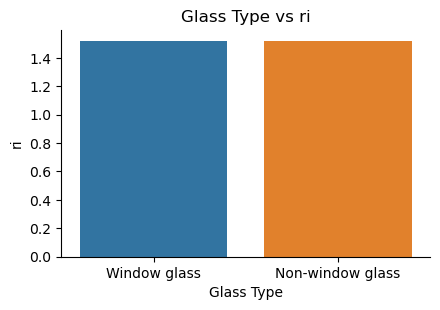

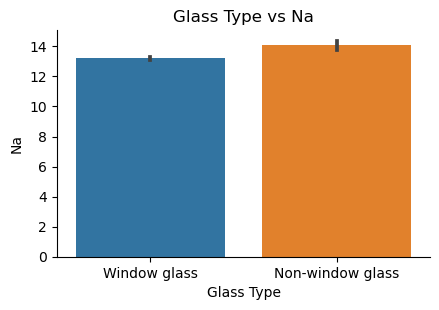

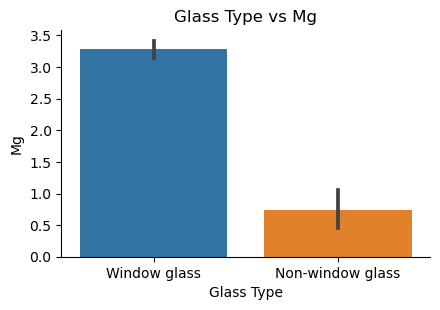

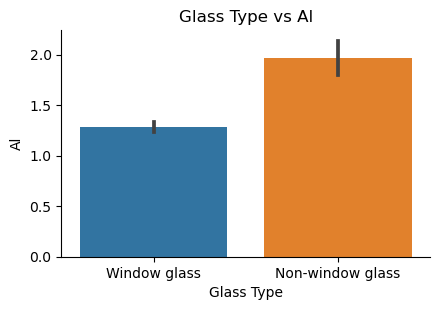

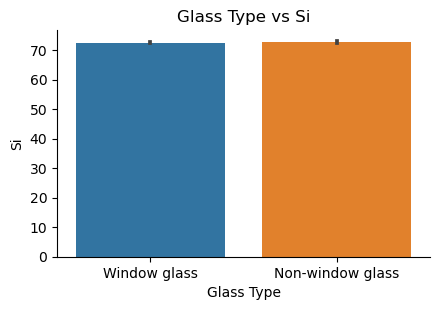

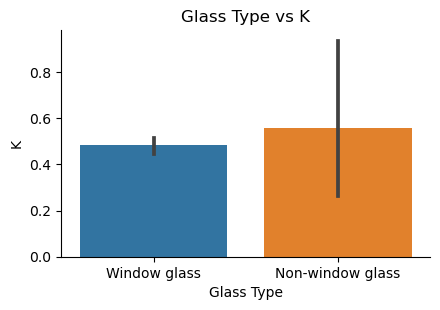

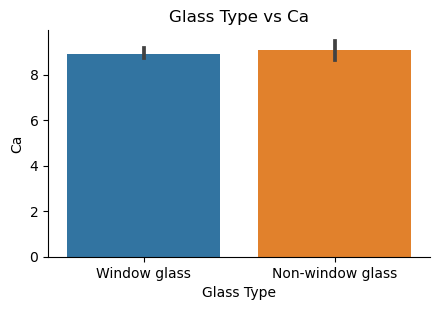

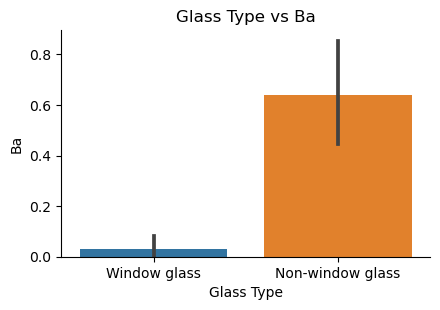

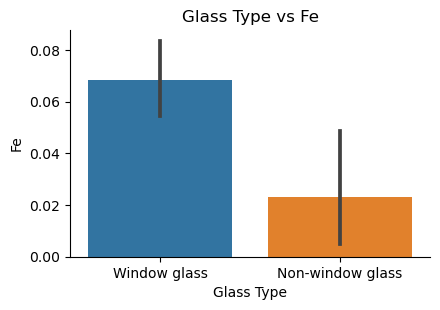

In [21]:
# plot glass type with their features
for i in glass_df1.columns[:-1]:
    sns.catplot(x='glass_type',y=i,data=glass_df1,height=3,aspect=1.5,kind='bar')
    plt.xlabel('Glass Type')
    plt.ylabel(i)
    plt.title(f'Glass Type vs {i}')

Observations:  
Both glass types have similar Refractive index and similar compositions of Silica and Sodium.  
Aluminium and Barium content is comparitively higher in non-window glass.  
Potassium, Magnesium, and Iron content is comparitively higher in window glass.  

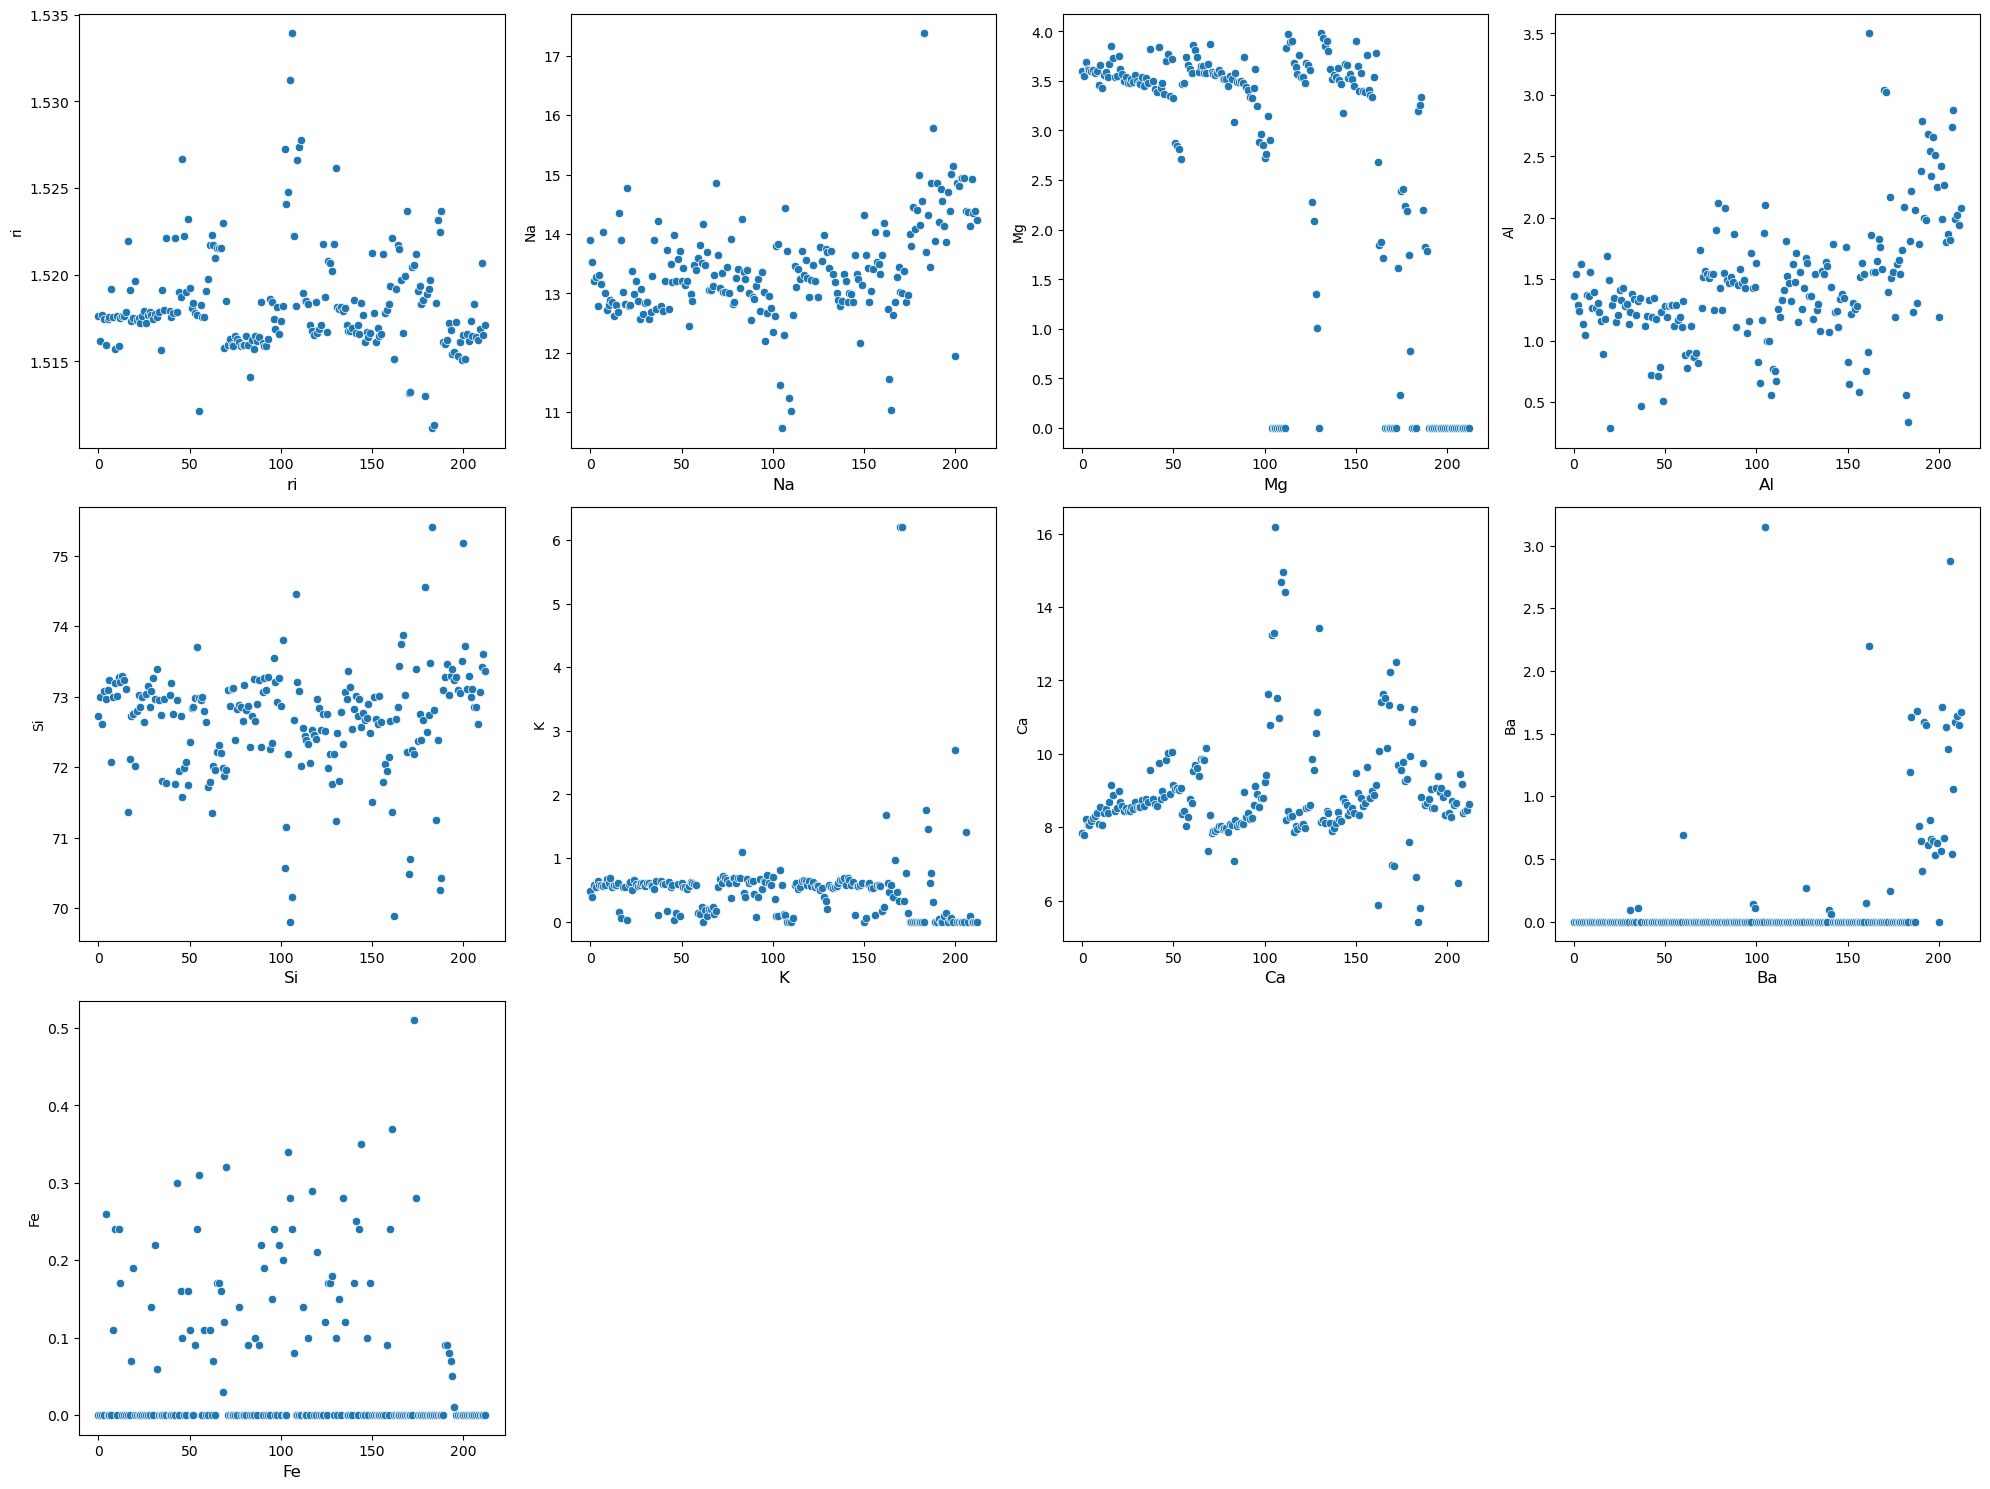

In [22]:
# check data distribution
x=glass_df1.drop('glass_type',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=10:
        ax=plt.subplot(3,4,plot)
        sns.scatterplot(x[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  
K, Ba and Fe content are mostly low in the glass types in the dataset  
Other elements and refractive index are almost equally distributed

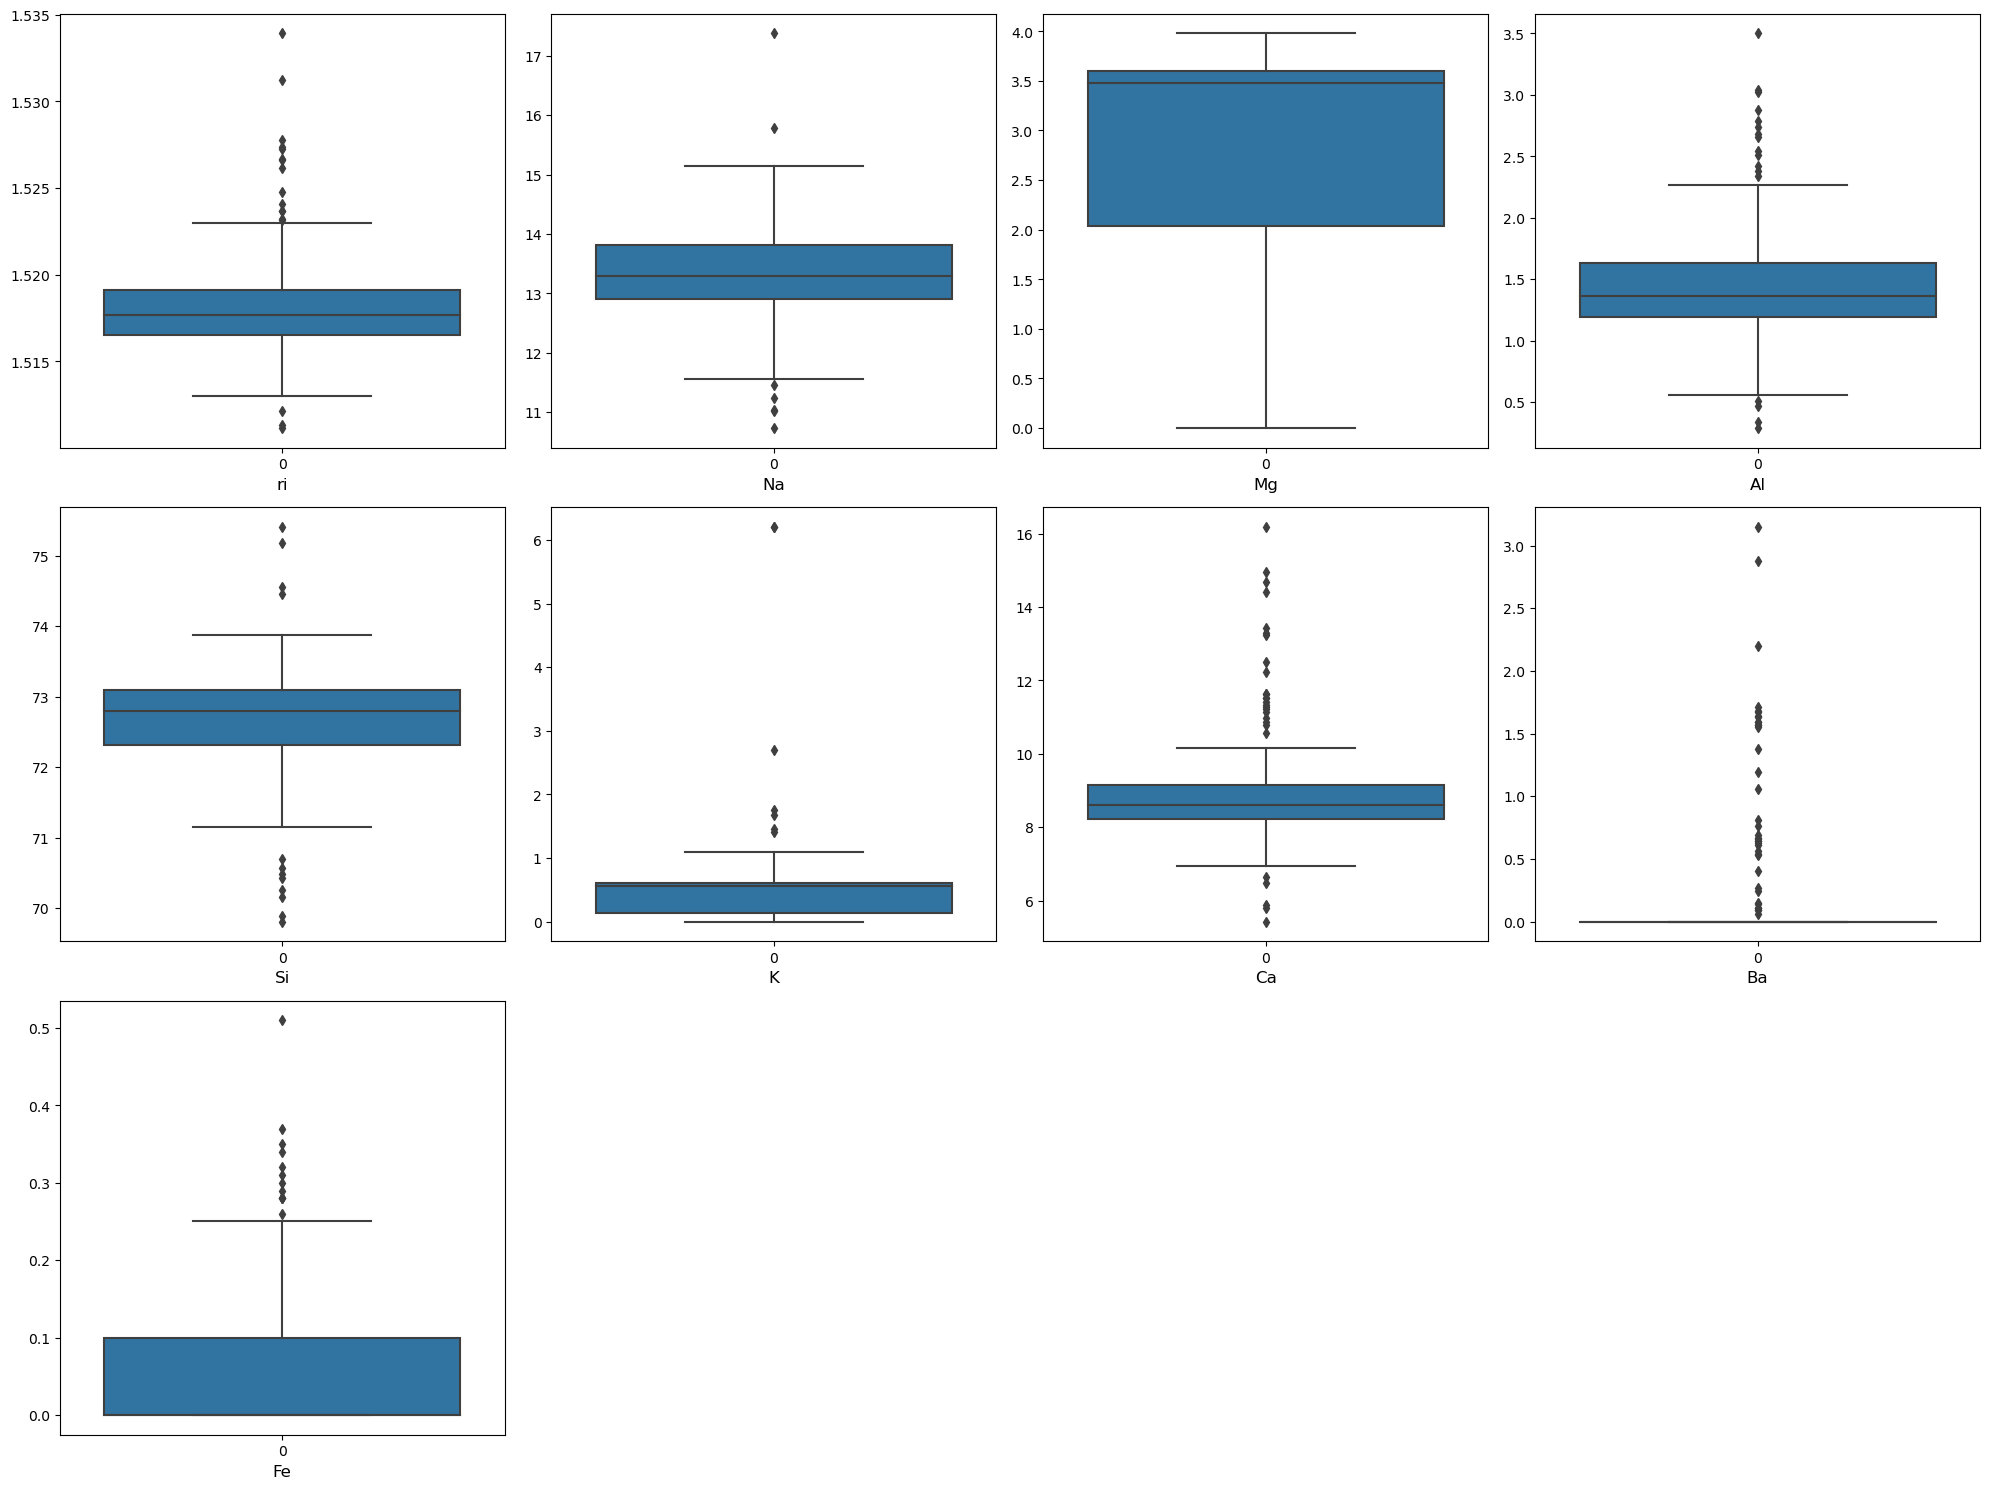

In [23]:
# check for outliers using boxplot 

plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=10:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  
There are more outliers in ri, Al, Si, Ca, Ba and Fe than the others

In [24]:
# outlier removal by z-score
from scipy.stats import zscore

X=np.cbrt(x)
z=zscore(X)
absolute_z=np.abs(z)
filter_z=(absolute_z<3).all(axis=1)
glass_df2=glass_df1[filter_z]
glass_df2.head()

,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,Window glass
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,Window glass
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,Window glass
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,Window glass
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,Window glass


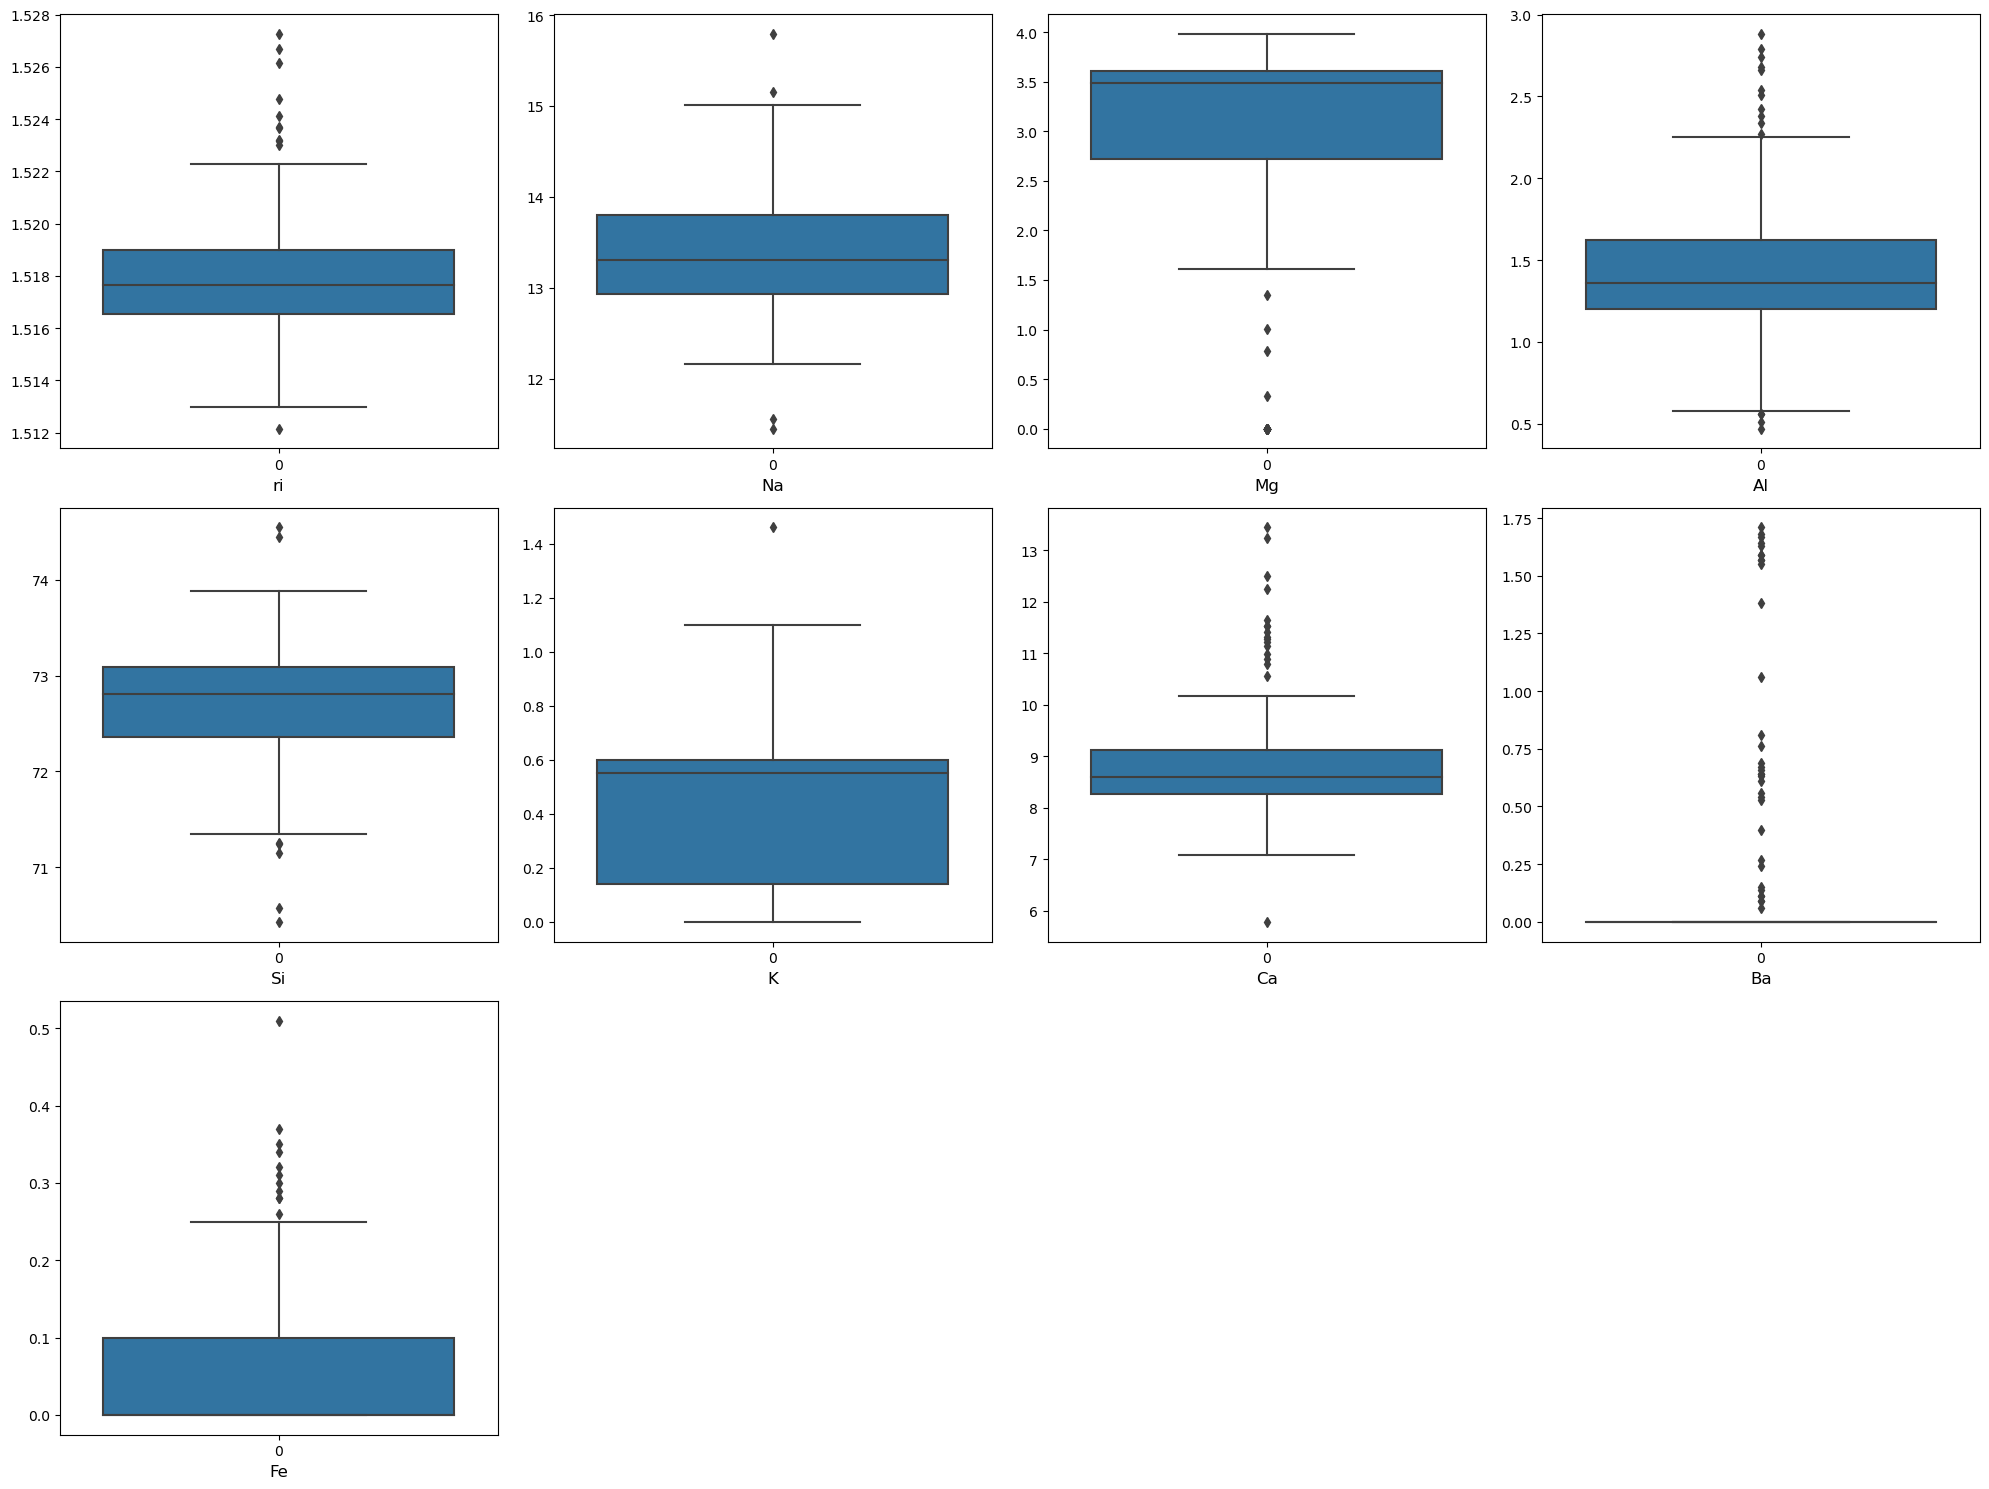

In [25]:
# check for outliers using boxplot after outlier removal

x=glass_df2.drop('glass_type',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=10:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

In [26]:
print(f'Original DataFrame shape: {glass_df1.shape}')
print(f'DataFrame shape after outlier removal: {glass_df2.shape}')
print(f'Number of outliers removed: {glass_df1.shape[0] -glass_df2.shape[0] }')

Original DataFrame shape: (212, 10)
DataFrame shape after outlier removal: (197, 10)
Number of outliers removed: 15


# Feature Selection

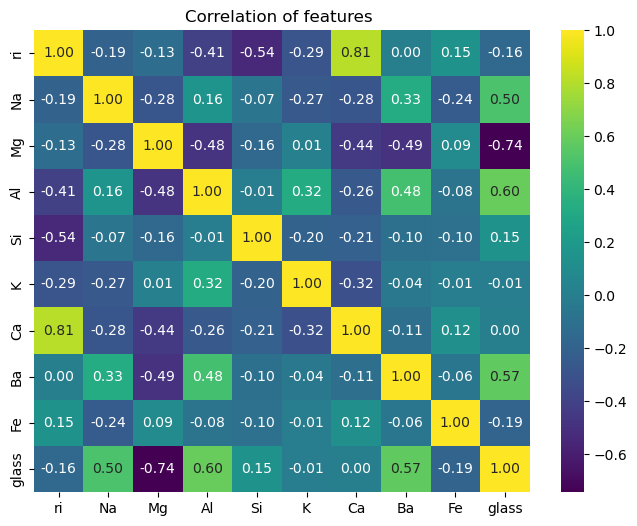

In [27]:
# correlation matrix

cm= glass_df.corr()
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True,cmap='viridis',fmt='.2f')
plt.title('Correlation of features ')
plt.show()

Observation:  
Glass type has significant positive correlation with Ba, Na and Al whereas significant negative correlation with Mg. 
Significant positive correlation exist between Ca and refractive index.  
Significant negative correlation exist between Si and refractive index.  
Multicollinearity needs to be checked.

In [28]:
# confirm multicollinearity by vif

x=glass_df2.drop('glass_type',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
2,Mg,185.939844
6,Ca,115.876587
1,Na,46.537761
4,Si,37.804841
3,Al,20.633481
7,Ba,17.754828
5,K,11.051404
0,ri,6.053560
8,Fe,1.195646


Observation:  
    Since Mg has high correlation with glass type, we can remove Ca (Ca has the second highest vif score) and check for reduction in multicollinearity in the dataset.

In [29]:
# confirm multicollinearity by vif

x=glass_df2.drop(columns=['glass_type','Ca'])
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
0,ri,5.498920
2,Mg,5.413932
4,Si,5.045013
1,Na,4.357670
3,Al,3.645500
5,K,2.766312
6,Ba,2.076603
7,Fe,1.103585


Observation:  
    Removal of Ca has reduced the VIF scores significantly (below 10), so we'll proceed with the data excluding Ca.

In [30]:
# removing Ca from datasset
glass_df2.drop('Ca',axis=1,inplace=True)
glass_df2.head(2)

,ri,Na,Mg,Al,Si,K,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,Window glass
1,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,Window glass


The selected features are: 'ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe'

In [31]:
glass_df2.head()

,ri,Na,Mg,Al,Si,K,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.00,Window glass
1,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.00,Window glass
2,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.00,Window glass
3,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.00,Window glass
4,1.51596,12.79,3.61,1.62,72.97,0.64,0.0,0.26,Window glass


In [32]:
# create a copy before further editing
glass_df3=glass_df2.copy()
glass_df3.head(2)

,ri,Na,Mg,Al,Si,K,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,Window glass
1,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,Window glass


In [33]:
# encode label before training
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

glass_type_encoded=le.fit_transform(glass_df3['glass_type'])

glass_df3['glass_type_encoded']=glass_type_encoded

In [34]:
glass_df3.drop('glass_type',axis=1, inplace=True)
display(glass_df3.head())

,ri,Na,Mg,Al,Si,K,Ba,Fe,glass_type_encoded
0,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,0.0,0.26,1


In [35]:
# splitting dataset into training and testing sets
x=glass_df3[['ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe']]
y=glass_df3['glass_type_encoded']

scaler = StandardScaler()
X_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,random_state=67)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(147, 8) (50, 8) (147,) (50,)


<Axes: xlabel='glass_type', ylabel='count'>

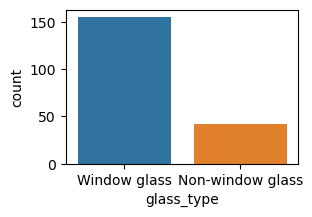

In [36]:
# checking for data imbalance
plt.figure(figsize=(3,2))
sns.countplot(x='glass_type',data=glass_df2)

In [37]:
glass_df2['glass_type'].value_counts()

glass_type
Window glass        155
Non-window glass     42
Name: count, dtype: int64

Observation:  
    There is significant imbalance in the data. Since the dataset is small, we can use oversampling to rectify it.

In [38]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(x_train,y_train)

In [39]:
# check label distribution before and after oversampling
from collections import Counter

print('Label distribution before oversampling: ', Counter(y_train),'\n')

print('Label distribution after oversampling: ', Counter(Y_train))

Label distribution before oversampling:  Counter({1: 112, 0: 35}) 

Label distribution after oversampling:  Counter({1: 112, 0: 112})


In [40]:
# check shape of train and test sets before and after oversampling

print('No. of feature data b/f smote: ', x_train.shape,'and No. of label data b/f smote: ',y_train.shape,'\n')

print('No. of feature data a/f smote: ', X_train.shape,'and no. of label data a/f smote: ', Y_train.shape)

No. of feature data b/f smote:  (147, 8) and No. of label data b/f smote:  (147,) 

No. of feature data a/f smote:  (224, 8) and no. of label data a/f smote:  (224,)


Text(0.5, 1.0, 'Label distribution after oversampling')

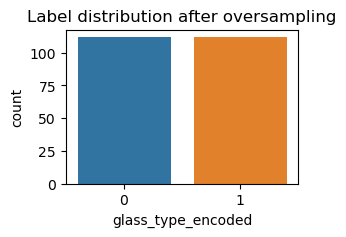

In [41]:
ytrain_df=pd.DataFrame(Y_train,columns=['glass_type_encoded'])
plt.figure(figsize=(3,2))
sns.countplot(x='glass_type_encoded', data=ytrain_df)
plt.title('Label distribution after oversampling')

Observation:  
    Now the dataset is balanced, and can be used for model building

# MODEL BUILDING & VALIDATION

In [106]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,y_pred1))
    else:
        y_pred2= model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(y_test,y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='YlGnBu',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted Glass Type')
        plt.ylabel('Actual Glass Type')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,x,y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')

Accuracy of train set:  0.9776785714285714
Accuracy of test set:  0.92

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.98      0.93      0.95        43

    accuracy                           0.92        50
   macro avg       0.82      0.89      0.85        50
weighted avg       0.93      0.92      0.92        50



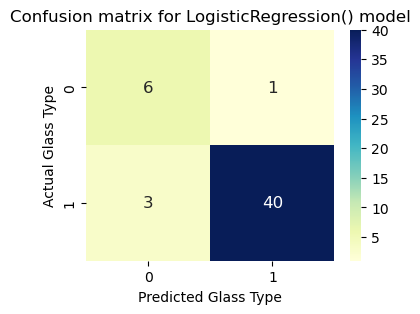


Cross validation score of the LogisticRegression() model : 0.8738461538461539


In [107]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,x_test,y_test,train=True)
score(lr,X_train,Y_train,x_test,y_test,train=False)

cv(lr)

Accuracy of train set:  0.9732142857142857
Accuracy of test set:  0.9

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       1.00      0.88      0.94        43

    accuracy                           0.90        50
   macro avg       0.79      0.94      0.84        50
weighted avg       0.94      0.90      0.91        50



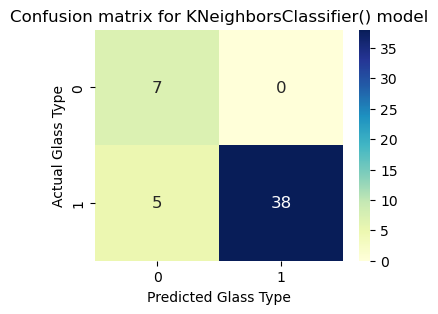


Cross validation score of the KNeighborsClassifier() model : 0.8937179487179486


In [108]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
score(knn,X_train,Y_train,x_test,y_test,train=True)
score(knn,X_train,Y_train,x_test,y_test,train=False)
cv(knn)

Accuracy of train set:  1.0
Accuracy of test set:  0.92

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.98      0.93      0.95        43

    accuracy                           0.92        50
   macro avg       0.82      0.89      0.85        50
weighted avg       0.93      0.92      0.92        50



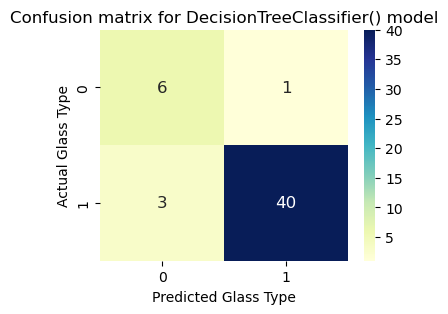


Cross validation score of the DecisionTreeClassifier() model : 0.8532051282051281


In [109]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,x_test,y_test,train=True)
score(dt,X_train,Y_train,x_test,y_test,train=False)
cv(dt)

Accuracy of train set:  1.0
Accuracy of test set:  0.92

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.91      0.95        43

    accuracy                           0.92        50
   macro avg       0.82      0.95      0.86        50
weighted avg       0.95      0.92      0.93        50



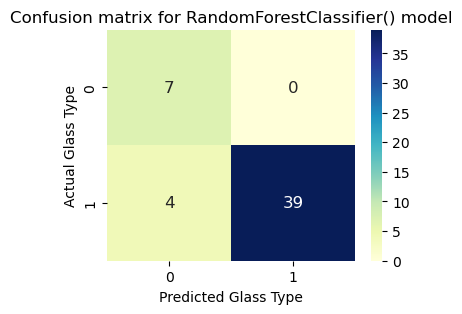


Cross validation score of the RandomForestClassifier() model : 0.8737179487179487


In [110]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,x_test,y_test,train=True)
score(rf,X_train,Y_train,x_test,y_test,train=False)
cv(rf)

Accuracy of train set:  0.9910714285714286
Accuracy of test set:  0.96

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.95      0.98        43

    accuracy                           0.96        50
   macro avg       0.89      0.98      0.93        50
weighted avg       0.97      0.96      0.96        50



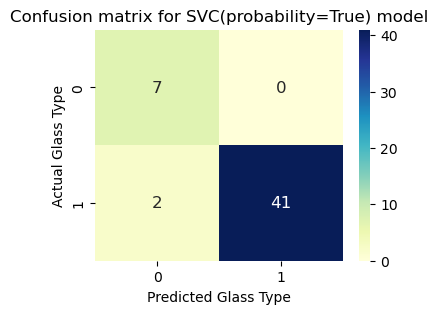


Cross validation score of the SVC(probability=True) model : 0.7869230769230768


In [111]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,x_test,y_test,train=True)
score(svc,X_train,Y_train,x_test,y_test,train=False)
cv(svc)

Accuracy of train set:  1.0
Accuracy of test set:  0.92

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.98      0.93      0.95        43

    accuracy                           0.92        50
   macro avg       0.82      0.89      0.85        50
weighted avg       0.93      0.92      0.92        50



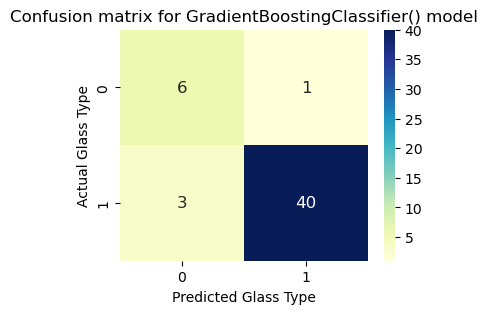


Cross validation score of the GradientBoostingClassifier() model : 0.8433333333333334


In [112]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,x_test,y_test,train=True)
score(gbc,X_train,Y_train,x_test,y_test,train=False)
cv(gbc)

Observations:  
All models are performing good.  
Models have high precision in predicting window glass than non-window glass.  
We can use precision recall curve to find the best model.

F1 score of Logistic Regression model is  0.9523809523809524
F1 score of Decision Tree model is  0.9397590361445783
F1 score of KNN model is  0.9382716049382717
F1 score of Random Forest model is  0.963855421686747
F1 score of SVC model is  0.9761904761904763
F1 score of Gradient Boosting model is  0.9397590361445783


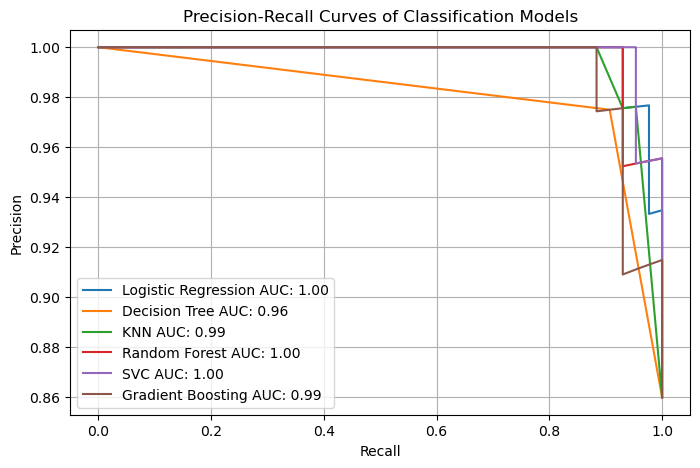

In [113]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'Decision Tree': dt,'KNN': knn, 'Random Forest': rf,'SVC': svc,
          'Gradient Boosting': gbc}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observations:  
Logistic Regression, SVC and Random Forest have the highest AUC of 1.  
We'll select SVC as it has comparitively higher F1 score(0.976) than Logistic Regression(0.952) and Random Forest(0.963) models.  
Hyperparameter tuning is not required as the base model has high scores.

In [120]:
# Save random forest model
pickle.dump(svc, open('glass_prediction_svc_model1.pkl','wb'))

In [121]:
# load model and view prediction vs actual charges
glass_prediction_model=pickle.load(open('glass_prediction_svc_model1.pkl','rb'))
y_pred=glass_prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result.head()

,Predicted,Actual
33,1,1
79,1,1
73,1,1
175,0,0
115,1,1


# Overall Summary

The dataset on "Glass Identification" was used to analyse and build machine learning models (binary classification) to predict two classes of glass types (window glass and non-window glass).

# Data Insights
* Both glass types have similar Refractive index and similar compositions of Silica and Sodium.  
* Aluminium and Barium content is comparitively higher in non-window glass.  
* Potassium, Magnesium, and Iron content is comparitively higher in window glass.  
* Glass type has significant positive correlation with Ba, Na and Al whereas significant negative correlation with Mg. 

# Selected model

Support Vector Classifier (svc) model is found to be the best model among the 6 models for this classification task with:

   * Accuracy: 0.96
   * Cross Validation: 0.786
   * Less number of False negatives (2) and False positives (0)